Dataset link
https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

#Logistic Regression

For a more detailed lesson on Logistic Regression see (watch the entire series) https://www.youtube.com/watch?v=zAULhNrnuL4

Used to predict categories (as opposed to a numerical values in Linear Regression) and solve classification machine learning problems. 

Will customer buy a product?
Will the team win the game?





## Difference bewteeen Logistic and Linear regression

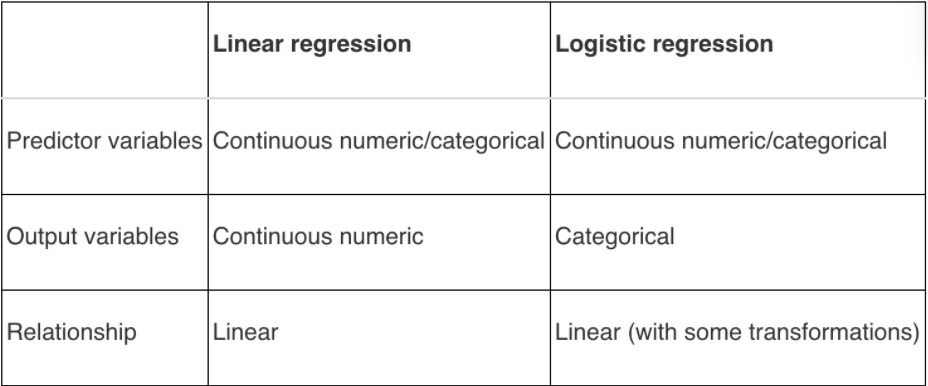

 ### Linear Regression
 
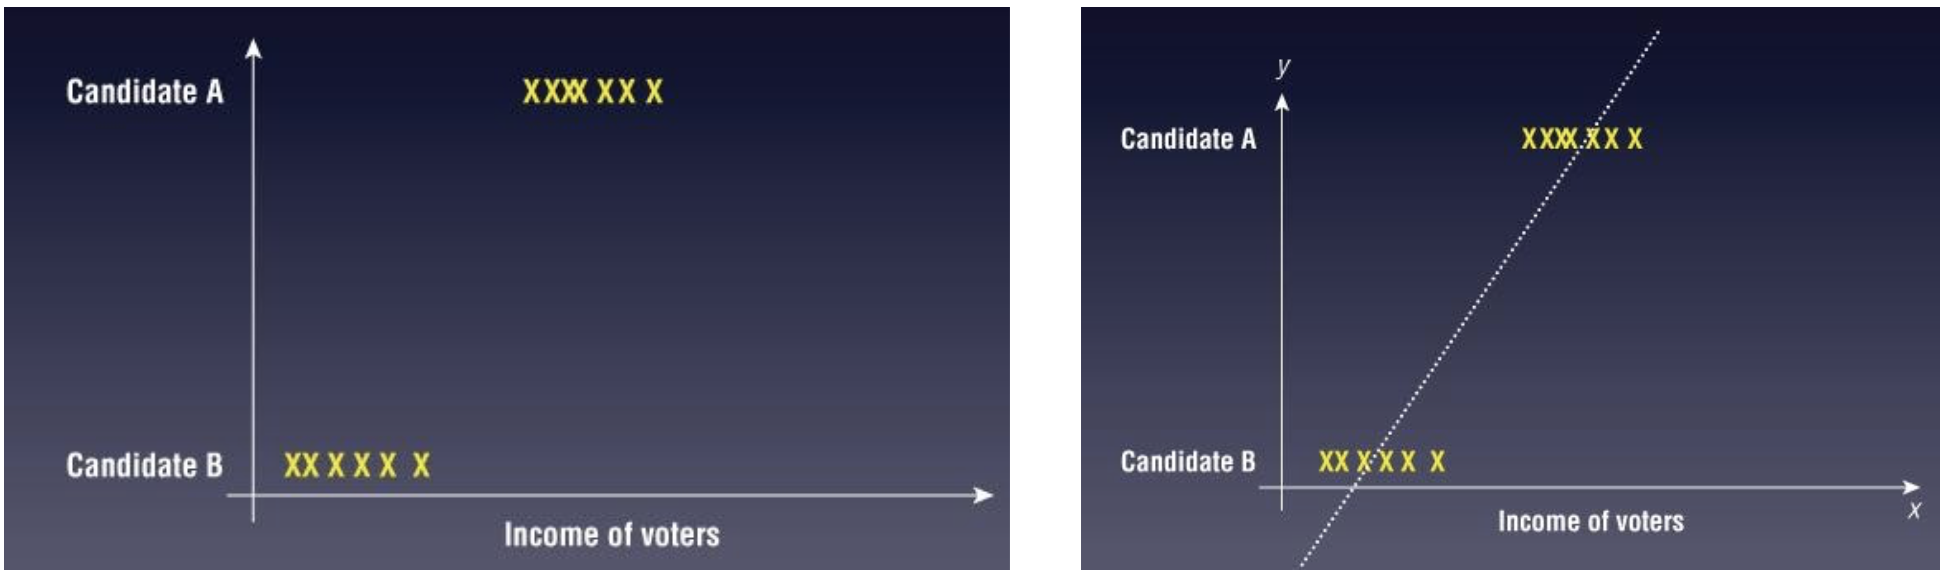 

 ### Logistic Regression
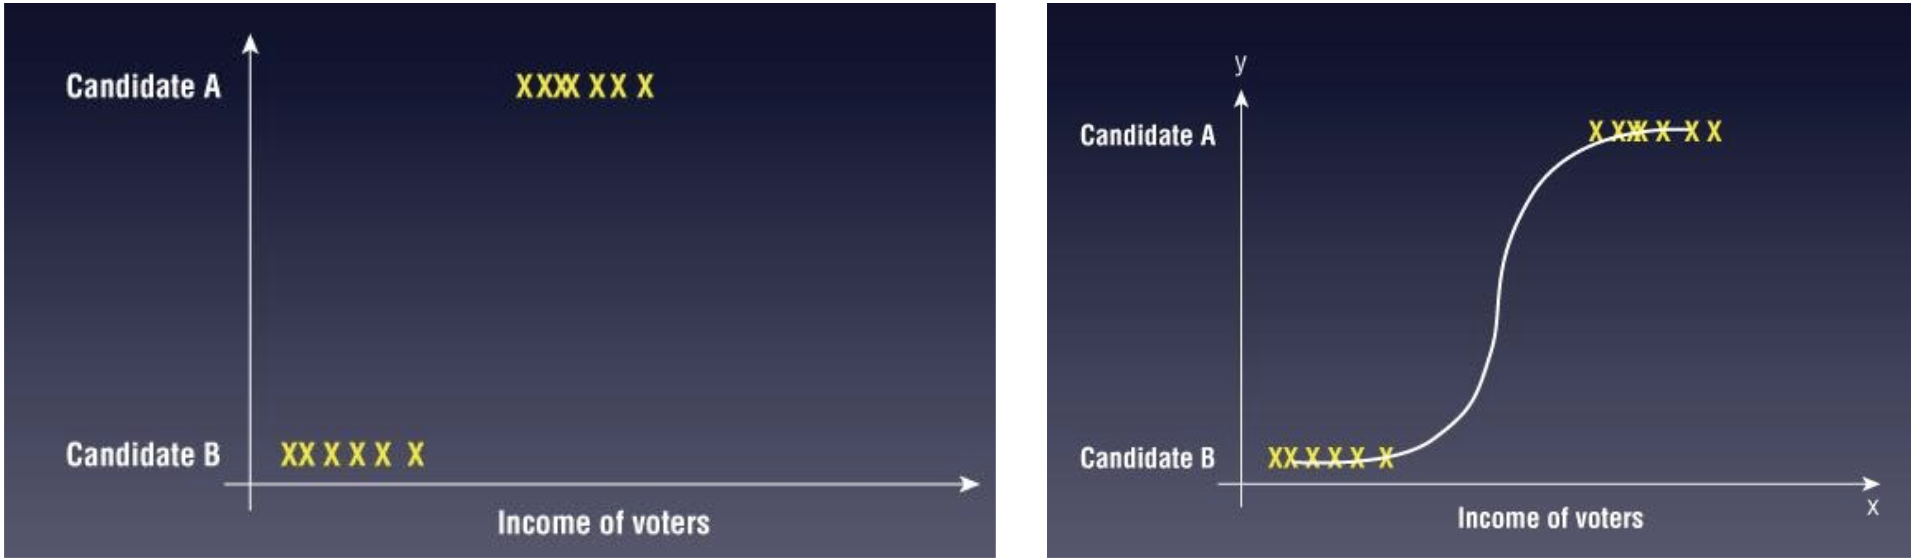 

Using logistic regression, the output will be a value from 0 to 1, where anything less than (or equal to) 0.5 (known as the threshold) will be considered as voting for candidate B, and anything greater than 0.5 will be considered as voting for candidate A.

 ## What are the chances of a customer buying a product based on their gender?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
df = pd.read_csv('GenderPurchase.csv')
print(df)



     Gender Purchase
0    Female      Yes
1    Female      Yes
2    Female       No
3      Male       No
4      Male      Yes
..      ...      ...
506    Male      Yes
507  Female      Yes
508    Male       No
509  Female      Yes
510  Female      Yes

[511 rows x 2 columns]


### Contingency table

A table of the frequency of observations falling under various categories of two or more variables.

Contingency table is a first step for data that has a binary outcome variable and categorical predictor variable.


In [ ]:
contingencyTable = pd.crosstab(df['Gender'], df['Purchase'])
print(contingencyTable)

Purchase   No  Yes
Gender            
Female    106  159
Male      125  121


In [ ]:
# sum of rows and columns of contingency table
print(contingencyTable.sum(axis=1))
print(contingencyTable.sum(axis=0))

# contingency table as percentages of gender total
print(contingencyTable.astype('float').div(contingencyTable.sum(axis=1), axis=0))

Gender
Female    265
Male      246
dtype: int64
Purchase
No     231
Yes    280
dtype: int64
Purchase       No      Yes
Gender                    
Female    0.40000  0.60000
Male      0.50813  0.49187


## **Conditional Probability**
The probability of a certain event happening, given that a certain related event is true or has already happened.

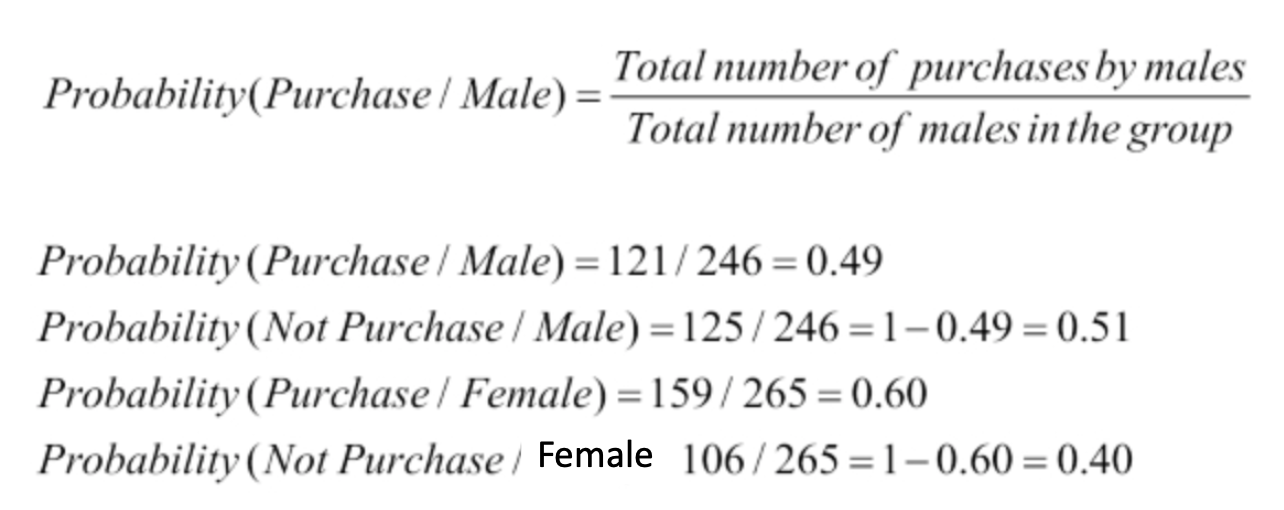


### **Odds Ratio**
A ratio of odds of success (purchase) for each group (male and female).

Odds of success: The ratio of probability of successes (purchases) to the probability of failures (non-purchases). 

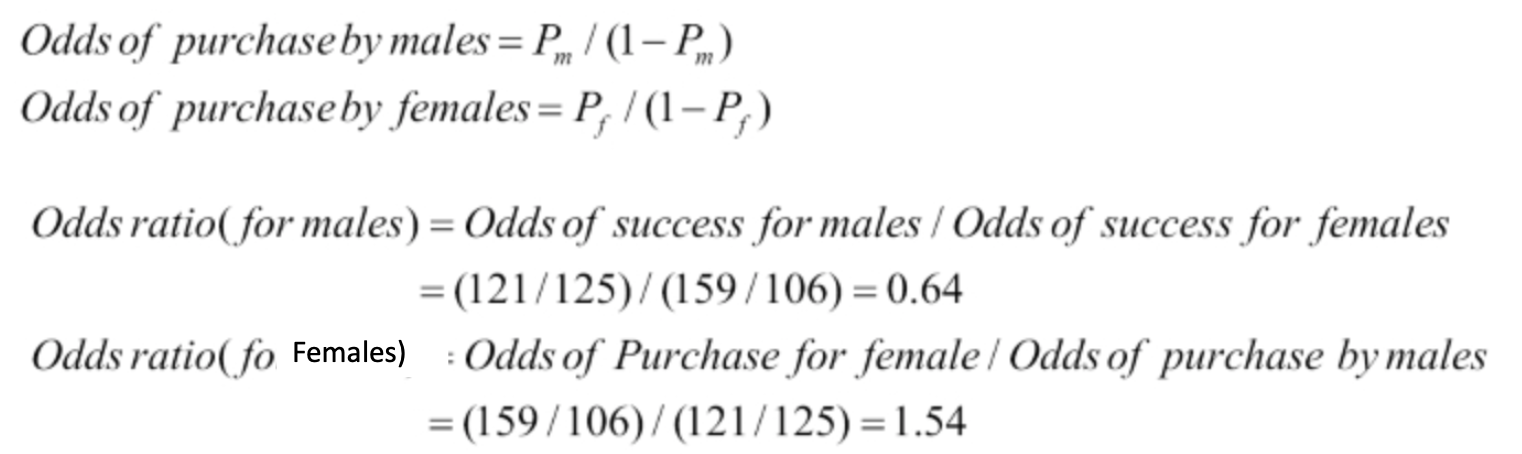


## Odds Ratio Interpretation


*   If the odds of success for a group is more than 1, then it is more likely for that group to be successful. The higher the odds, the better the chances of success.
*   If the odds of success is less than 1, then then it is more likely to get a failure. The lower the odds, the higher the chances of failure.

*   The odds can range from 0 to infinity.
*   If the odds ratio = 1, then no association between the two variables.
*   If odds ratio > 1, then success of group more likely. 
*   If odds ratio < 1, then success of group less likely
*   The odds ratio for one group is the reciprocal of the odds ratio of the other group.

More probable for female to purchase than for male to purchase.



### **From Linear to Logistic Regression**

Need 0 or 1 but not possible so settle for range 0 to 1
Switch to conditional probability but no match for x

**Y = a + b * X** (**Y** range: –inf to +inf   **X** range: –inf to +inf)

**P = a + b * X**  (**P** range: 0 to 1; **X** range: –inf to +inf; P conditional probability of success given X)

**P/1-P = a + b * X** (**P/1-P** range: 0 to +inf; **X** range: –inf to +inf;
P/1-P odds of success given X)

**log(P/1-P) = a + b * X** ( **log(P/1-P)** range: -inf to +inf; **X** range: –inf to +inf)


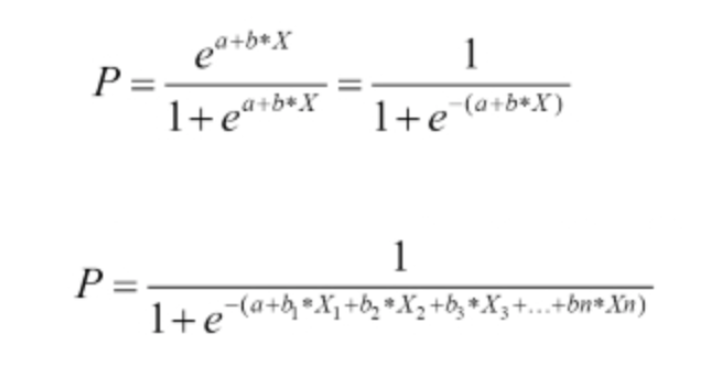


*   If a+b*X is small, then P approaches 0
*   If a+b*X is large, then P approaches 1
*   If a+b*X is 0, then P = 0.5








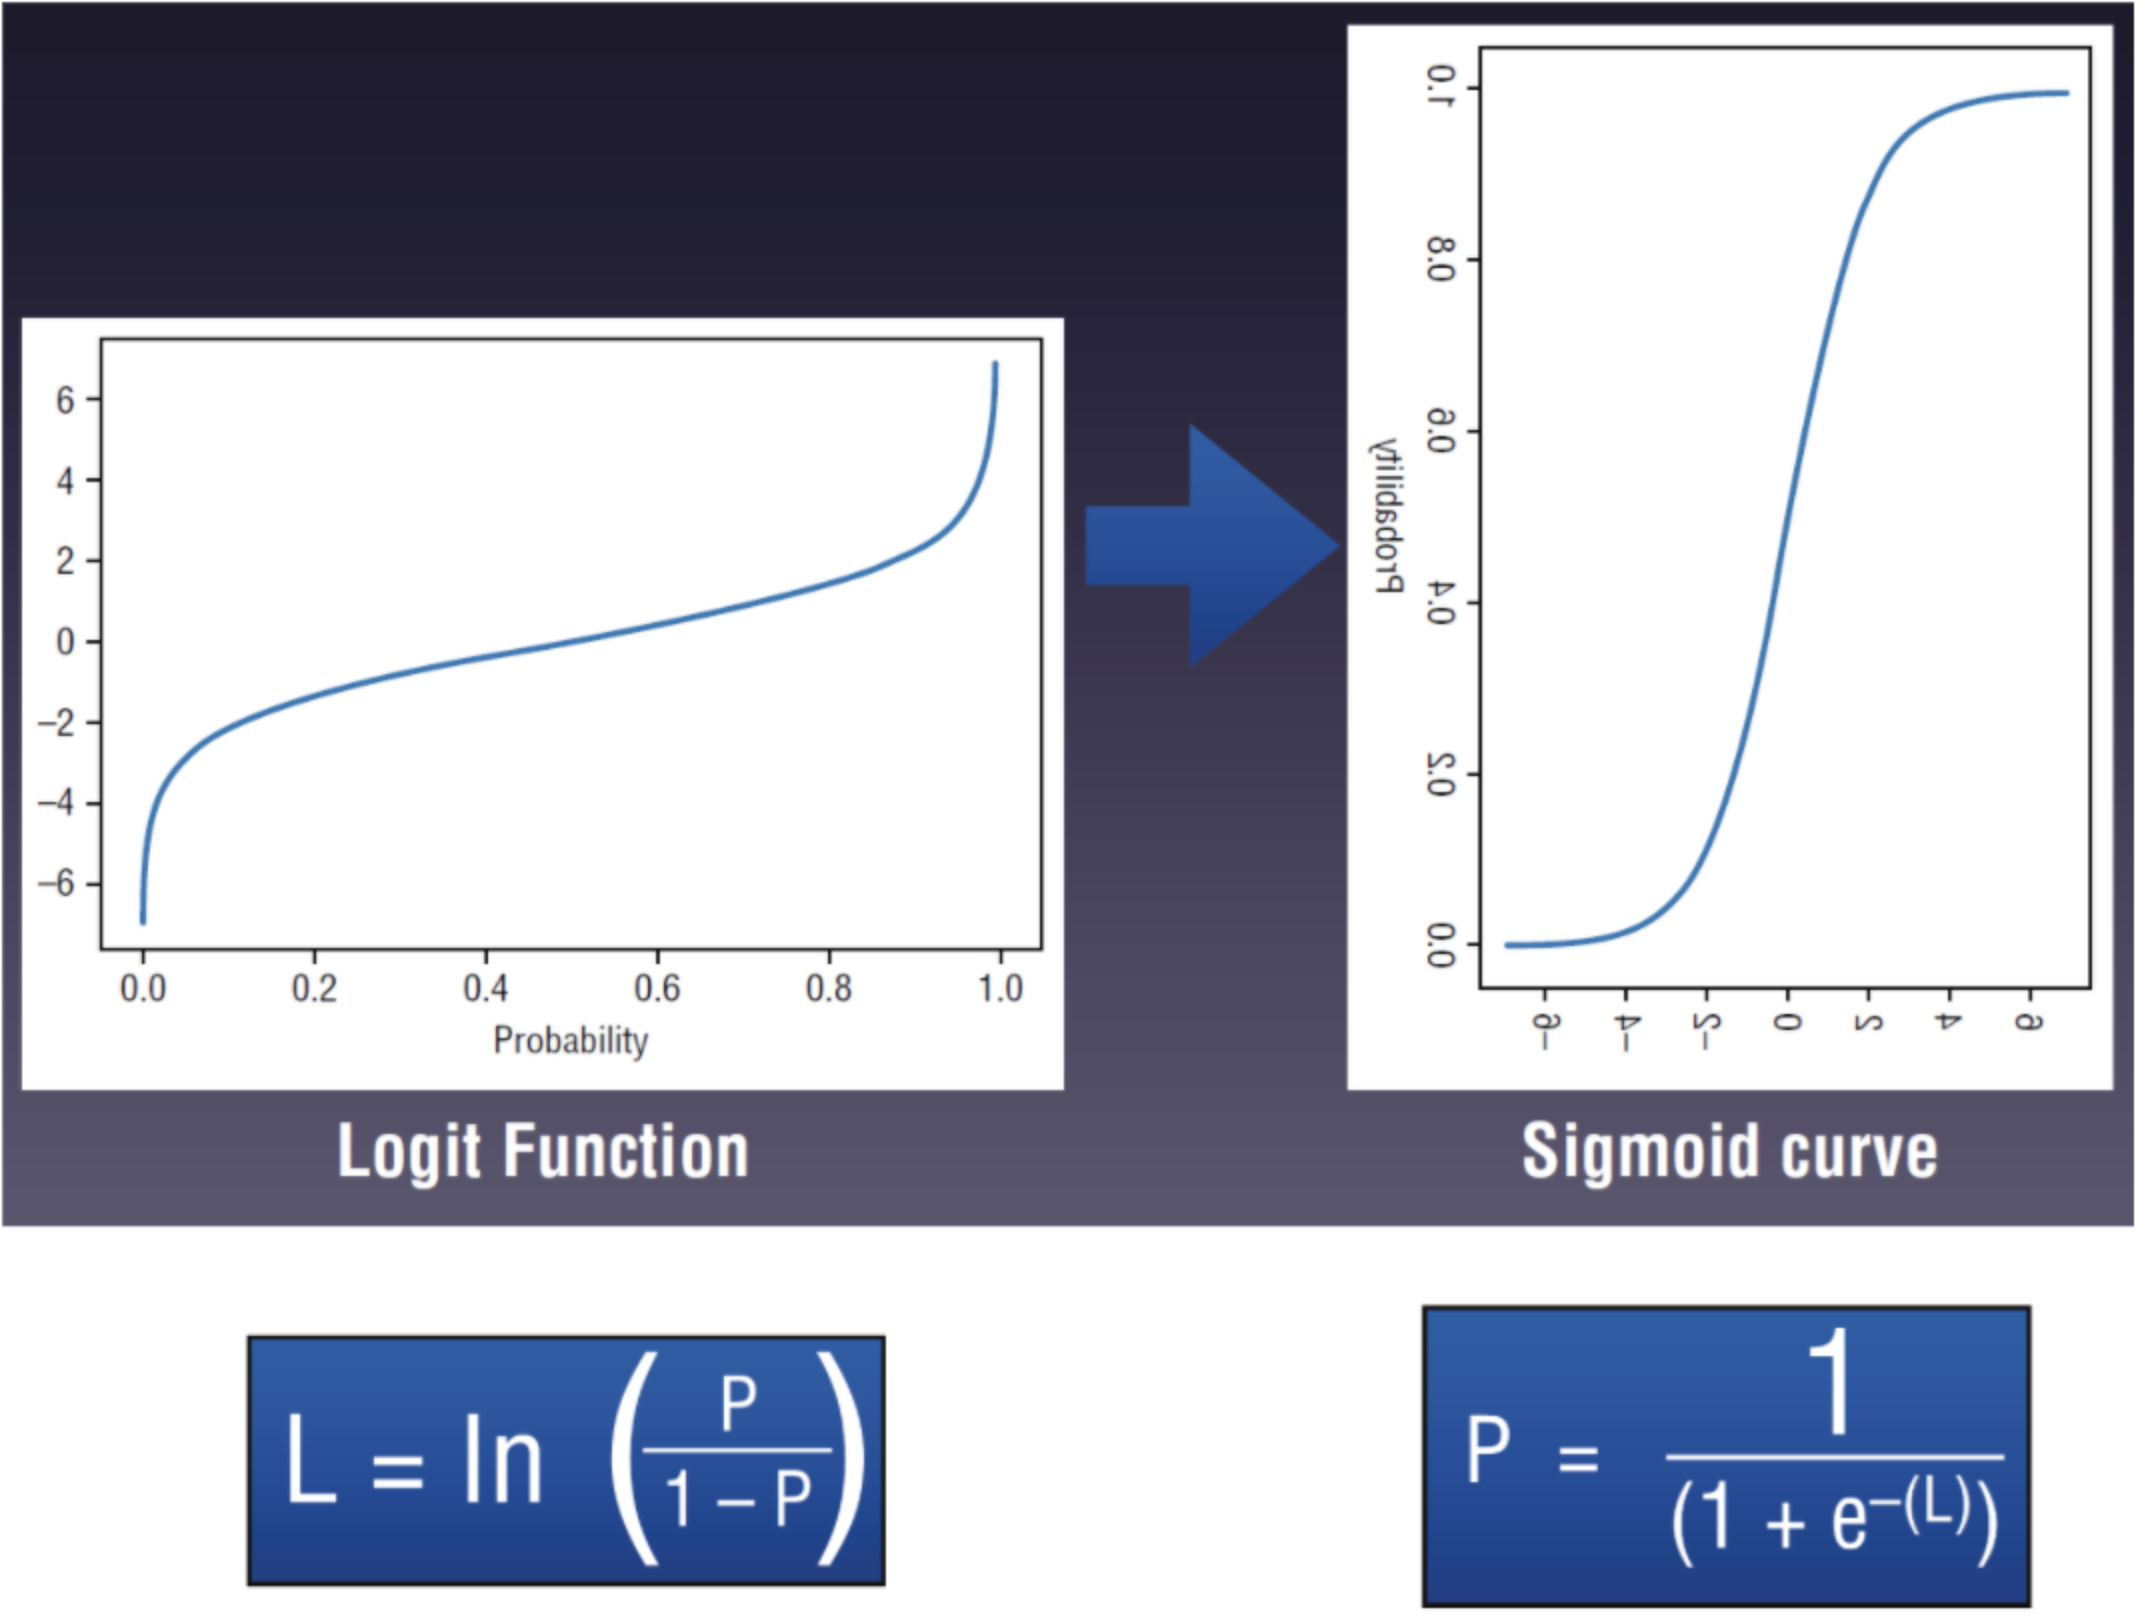

#**Diabetes Example**

https://www.kaggle.com/uciml/pima-indians-diabetes-database

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.




In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=1, names=col_names)
print(pima.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         1       85  66    29        0  26.6     0.351   31      0
1         8      183  64     0        0  23.3     0.672   32      1
2         1       89  66    23       94  28.1     0.167   21      0
3         0      137  40    35      168  43.1     2.288   33      1
4         5      116  74     0        0  25.6     0.201   30      0


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols] # features
y = pima['label'] # target variable

print(sum(y==0)/y.shape[0])




print(X.head())
print(y.head())

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


0.651890482398957
   pregnant  insulin   bmi  age  glucose  bp  pedigree
0         1        0  26.6   31       85  66     0.351
1         8        0  23.3   32      183  64     0.672
2         1       94  28.1   21       89  66     0.167
3         0      168  43.1   33      137  40     2.288
4         5        0  25.6   30      116  74     0.201
0    0
1    1
2    0
3    1
4    0
Name: label, dtype: int64


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

# instantiate the model (using default parameters)
logReg = LogisticRegression()

# fit the model with data
logReg.fit(X_train, y_train)

# make predictions
y_pred = logReg.predict(X_test)

# evaluate the performance
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X,y)
dummy_clf.score(X, y)


#metrics.plot_confusion_matrix(logReg, X_test, y_test)

[[118  13]
 [ 26  35]]
Accuracy: 0.796875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.651890482398957

**Confusion matrix**

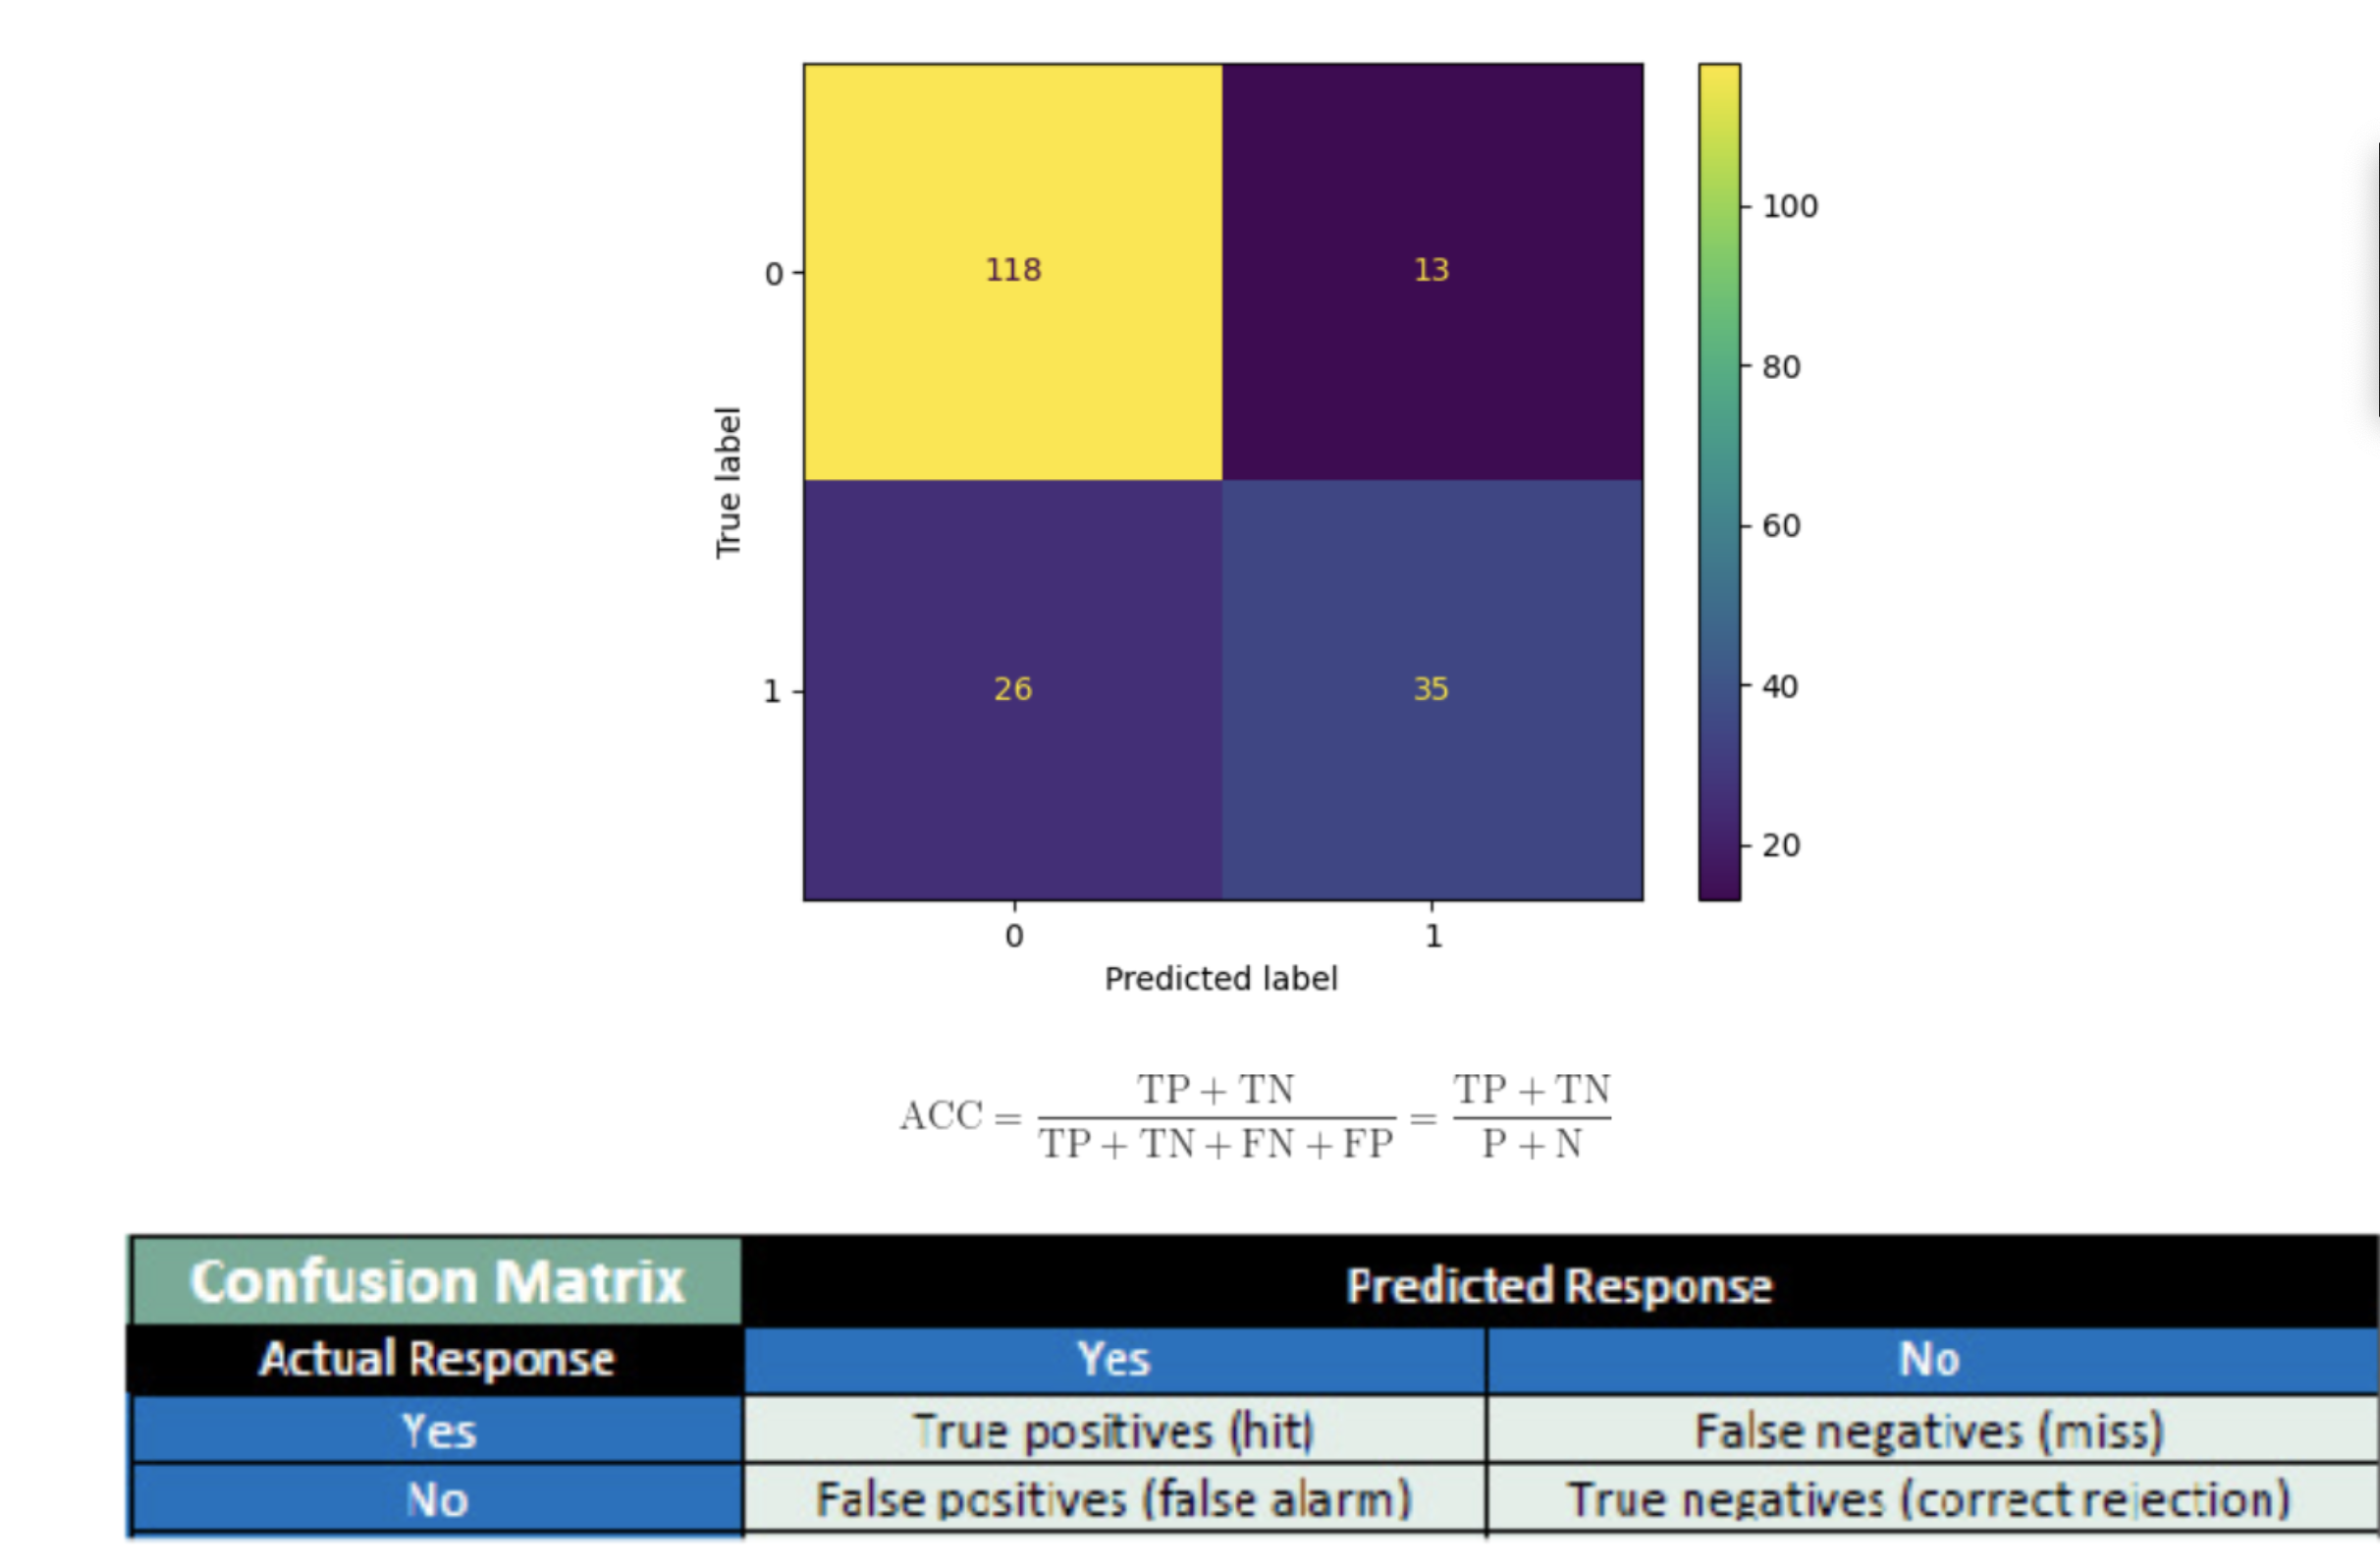

#**Banking Example**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Attribute Information:

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#### **Dummy Variables:** 

Let's learn about dummy varibales before proceeding further.


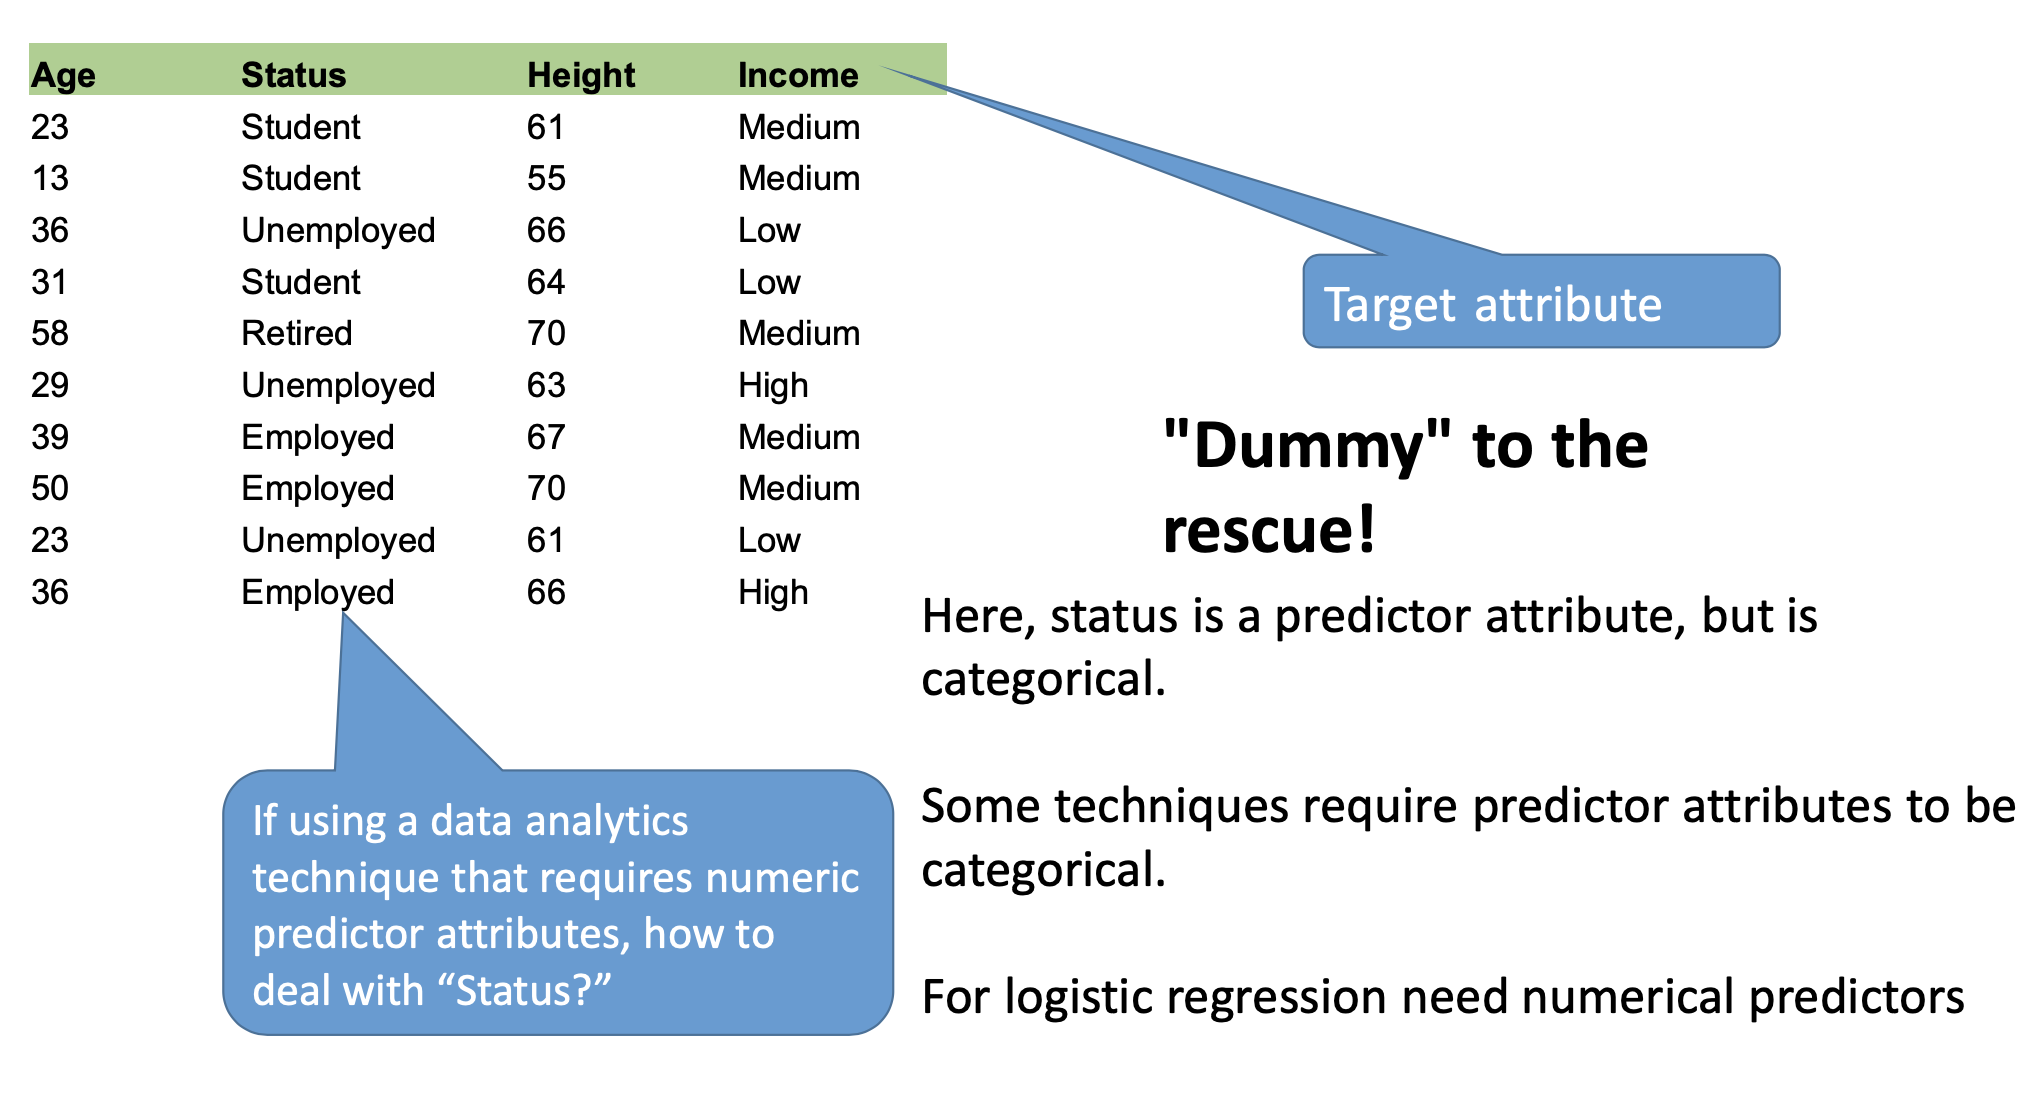

Here, status is a predictor attribute, but is categorical. 

Some techniques require predictor attributes to be categorical. 

For logistic regression need numerical predictors.



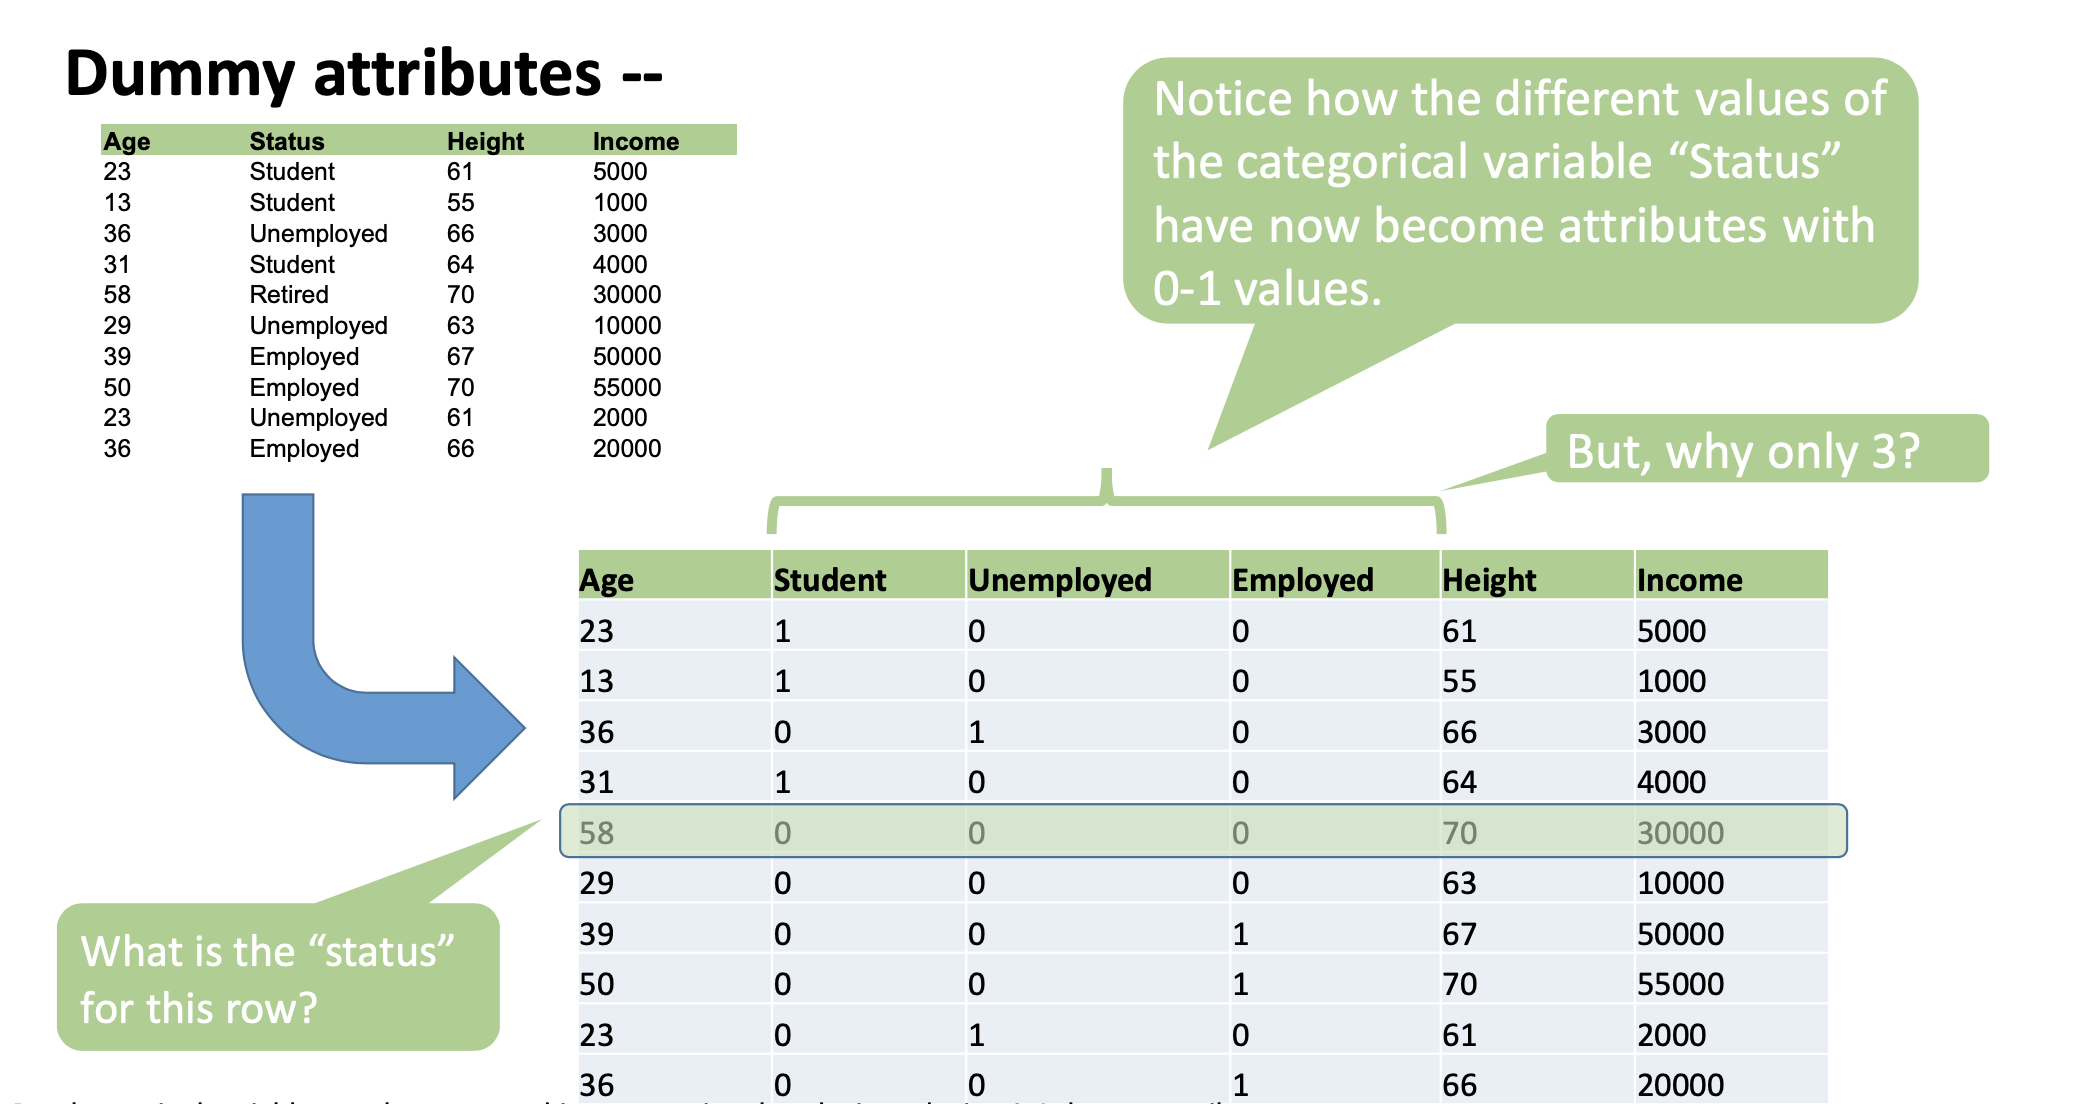

Purely nominal variables can be converted into numeric values by introducing 0-1 dummy attributes.

Dummy attributes are simply the possible values of the nominal attribute. We choose n-1 of the values because we can infer the value of the other, based on these


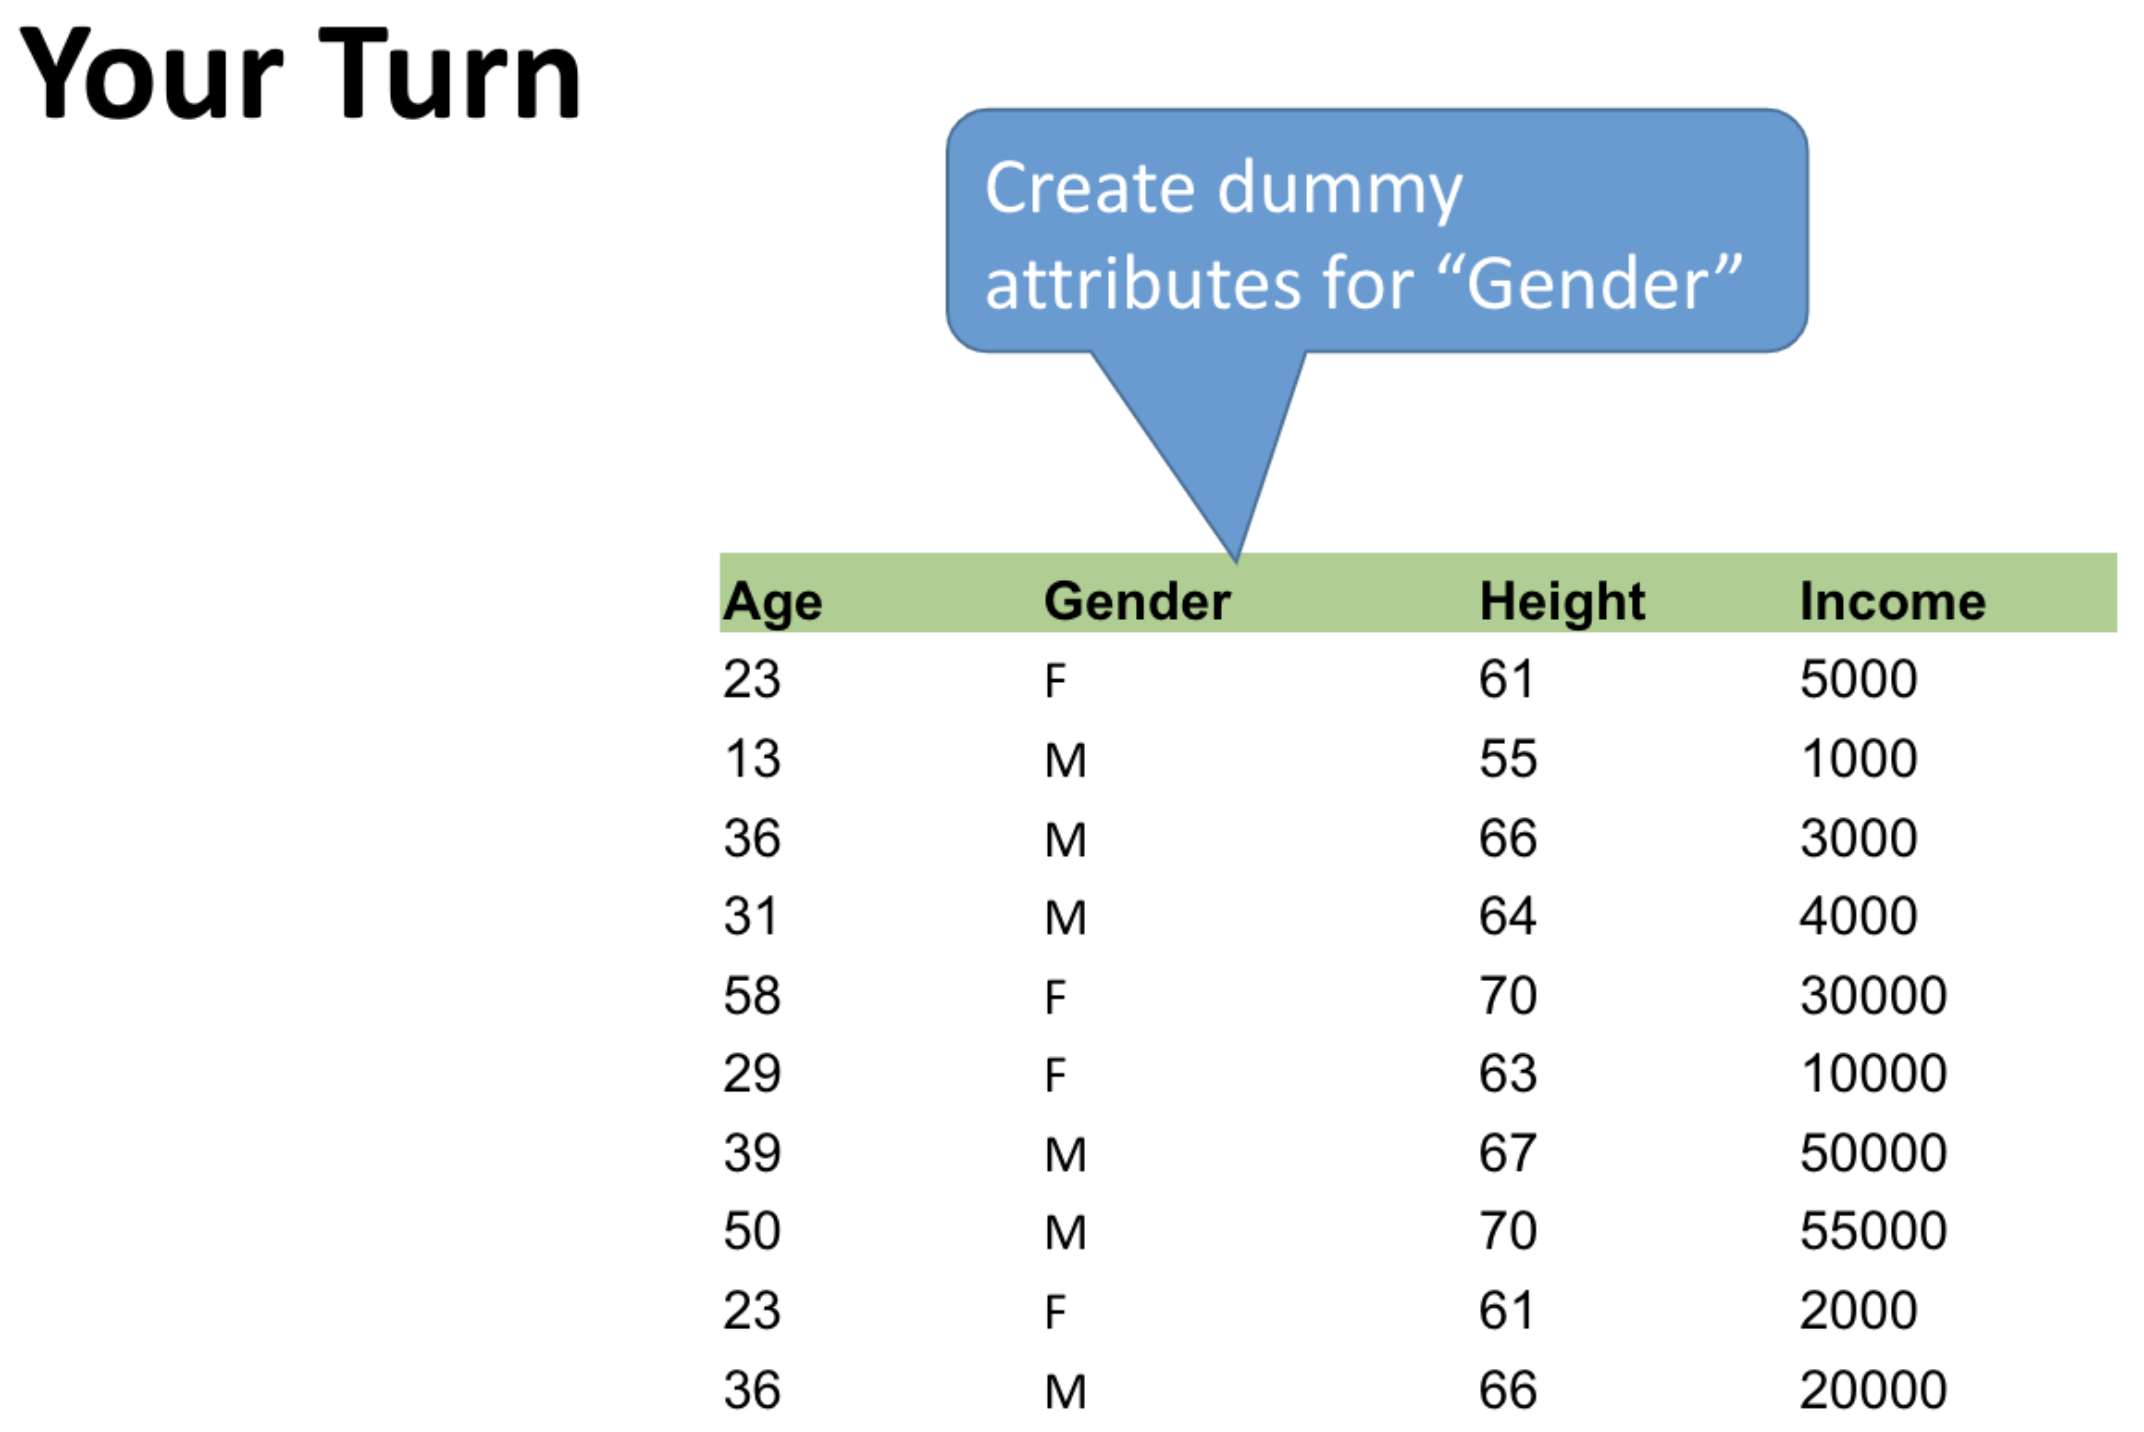


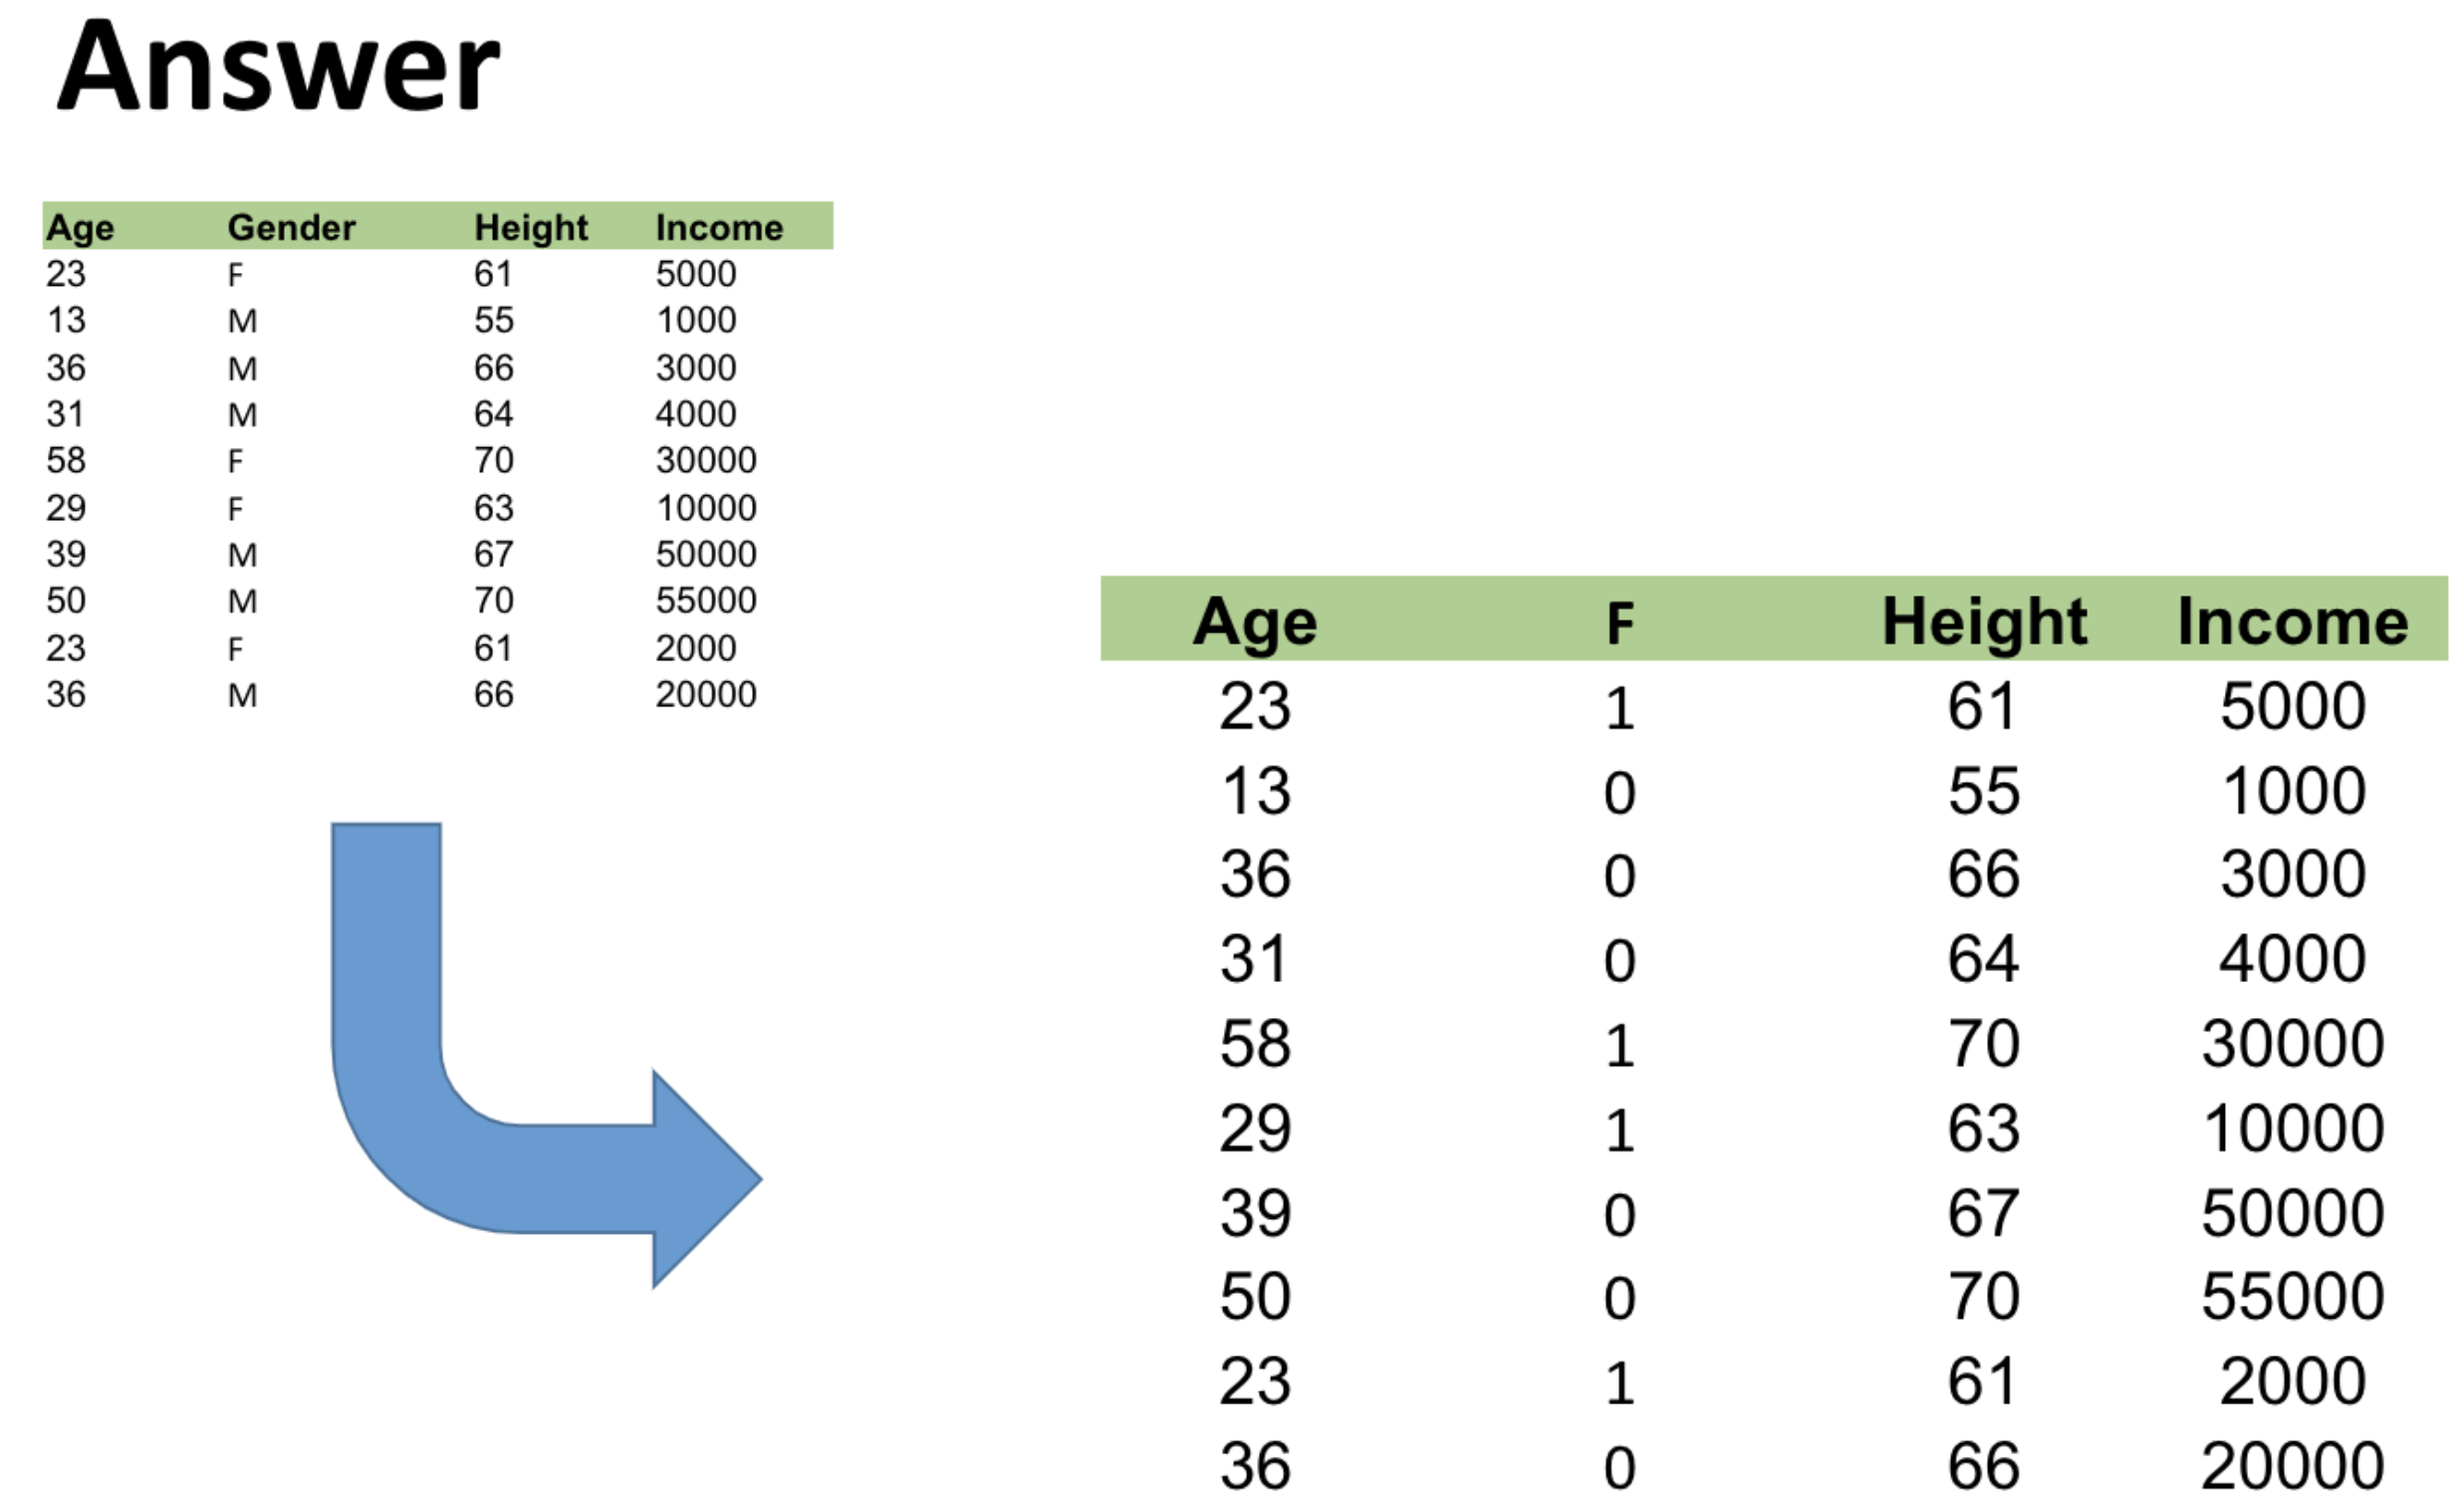

## Exploring and creating a logistic model using banking data:

In [ ]:
# Create a DataFrame variable containing the banking data CSV file.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
bankData = pd.read_csv('banking.csv')
print(bankData.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

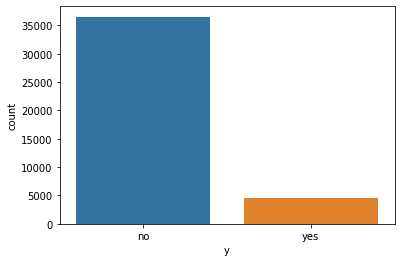

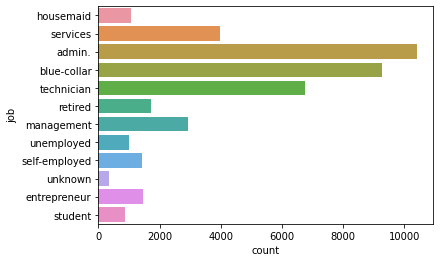

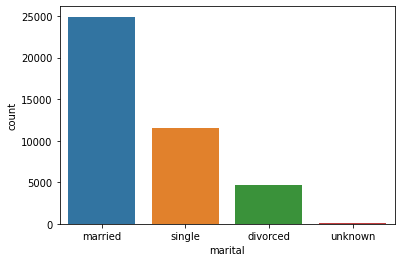

In [ ]:
# Explore the dataset and determine what the dependent variable (target array) is. 
# Analyze the dependent variable as well as some key independent variables and make sure there are no missing values.
print(bankData.head())
print(bankData.shape)
print(bankData.columns.values)
print(bankData.isnull().sum())

plt.figure(1)
sb.countplot(x='y', data=bankData)

plt.figure(2)
sb.countplot(y='job', data=bankData)

plt.figure(3)
sb.countplot(x='marital', data=bankData)

plt.show()

In [ ]:
# Determine what features to include in the model. Remove the features you won’t include from the dataFrame.
#bankData.drop(bankData.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)
print(bankData.head())
# Create dummy variables for all the categorical variables that you have kept.
df2 = pd.get_dummies(bankData, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
print(df2.head())

# Drop all the ’unknown’ columns.
df2.drop(df2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
print(df2.head())

         job  marital  default housing loan     poutcome   y
0  housemaid  married       no      no   no  nonexistent  no
1   services  married  unknown      no   no  nonexistent  no
2   services  married       no     yes   no  nonexistent  no
3     admin.  married       no      no   no  nonexistent  no
4   services  married       no      no  yes  nonexistent  no
    y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  no           0                0                 0              1   
1  no           0                0                 0              0   
2  no           0                0                 0              0   
3  no           1                0                 0              0   
4  no           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                 

In [ ]:
# Split the data into a training and test set.
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 23)
(28831,)
(12357, 23)
(12357,)


In [ ]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.8969005422028
[[10825   144]
 [ 1130   258]]


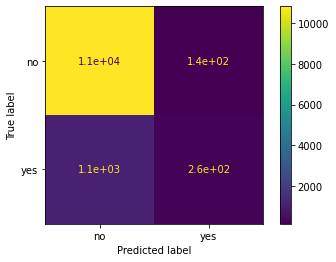

0.8876750020231448

In [ ]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
dummy_clf.score(X_test,y_test)

In [ ]:
# Print precision, recall, F-beta score and support
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94     10969
         yes       0.64      0.19      0.29      1388

    accuracy                           0.90     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357




* The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

* The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.  
2 * recall * precision / (recall + precision)

* The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

* The **support** is the number of occurrences of each class in y_test.


# **Towards Preventing Overfitting: Regularization**

Overfitting is a phenomenon where a machine learning model models the training data too well but fails to perform well on the testing data. Performing sufficiently good on testing data is considered as a kind of ultimatum in machine learning.

There are quite a number of techniques which help to prevent overfitting. Regularization is one such technique

## What is overfitting in machine learning?

Before explaining overfitting, we will talk about generalization in machine learning.

Generalization refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning (testing set in short).
The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. This allows you to make predictions in the future on data the model has never seen.

Overfitting happens when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on unseen data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the model's ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned to remove some of the detail it has picked up. On the other hand, Underfitting refers to a model that can neither model the training data nor generalize to new data.

## What is Regularization?


When you hear the word Regularization without anything else related to Machine Learning, you all understand that Regularization is the process of regularizing something or the process in which something is regularized. The problem is: what is exactly something. Regarding Machine Learning, you talk about learning algorithms or models, and what is actually inside the algorithms or models? That’s the set of parameters. In short, Regularization in machine learning is the process of regularizing the parameters that constrain, regularizes, or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, avoiding the risk of Overfitting

Why regularizing the parameters helps to prevent Overfitting? Let’s consider the graph below:

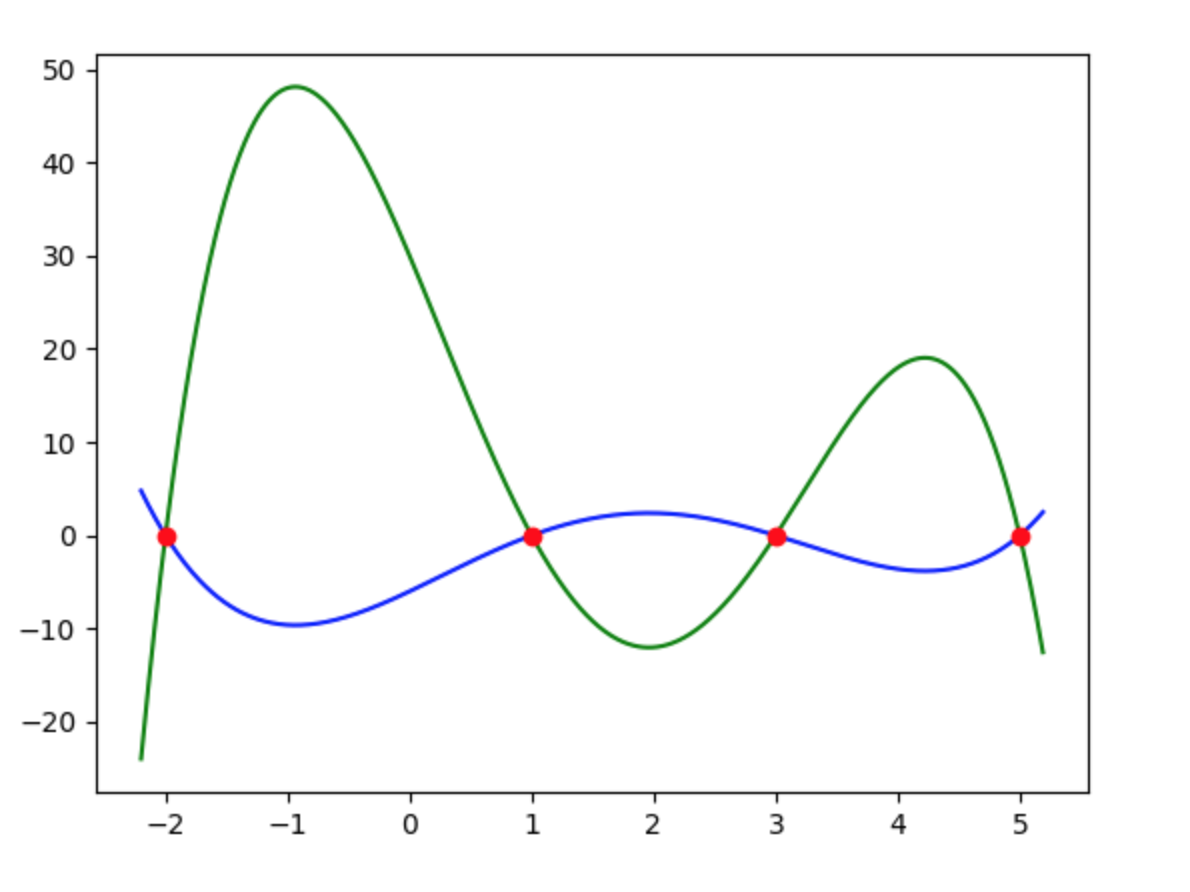

As you can see in the graph, it has got two functions represented by a green curve and a blue curve respectively. Both the curves fit those red points so well that you can consider they both incur zero loss. From the intuition of Overfitting, the green curve is on that overfits. 

To understand that in a bit more mathematical way, let’s assume the two functions that are used to draw the graph above:



The green curve:

$h_{1}x=-x^4+7x^3-5x^2-31x+30$

The blue curve:

$h_{2}x=\frac{x^4}{5}-\frac{7x^3}{5}+x^2+\frac{31x}{5}-6$

If you look at each function’s equation, you will find that the green curve has larger coefficients, and that’s the primary cause of Overfitting. As mentioned before, Overfitting can be interpreted that your model fits the dataset so well, which it seems to memorize the data we showed rather than actually learn from it. Intuitively, having large coefficients can be seen as evidence of memorizing the data. For example, you got some noises in our training dataset, where the data’s magnitude is far different than the others, those noises will cause our model to put more weight into the coefficient of higher degree, and what you received is a model that overfits our training data!

Often in Data Science problems, with an increasing number of features, a machine learning model can fit your data well. But everything has its drawback. If you add too many features, we will be punished with Overfitting. Some of you may think, if adding so many features causes Overfitting, than why don’t we just stop adding features when we got an acceptable model? But think about that this way. If your customer or your boss wants a learned model with 95% accuracy, but you can’t achieve that result without adding some more features, which results in overfitting the data. What will you do in the next step?

Or think about it in one other way. You are facing a problem where you are provided with a large dataset, and each of them contains many features. You don’t know which features to drop, and even worse if it turns out that every feature is fairly informative, which means that dropping some features will likely ruin the algorithm’s performance. What do you plan to do next?

The answer is regularization.



### The Regularization term:

Therefore, it’s not always a good idea to drop some features to prevent Overfitting. And as you saw in the example above, it requires further analysis to know whether you can remove some less informative features. So, it’s a good practice that you use all features to build your first model in the beginning. And Regularization comes out as a solution. To make it more transparent, let’s first take a look at the MSE cost function (MSE: Mean Squared Error):

$J = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(X^{(i)})-(y^{(i)}))^2} $

Where,

*   $h_{\theta}(X^{(i)}$ is the learned prediction given on the i-th input parameter $X^{(i)}$.
*   $y^{(i)}$ is the original prediction
*   m is the total number of input sample






In models like Logistic Regression, the objective of learning is to minimize this MSE function. It means that your parameters can be updated in any way, just to lower the MSE value. And as mentioned you above, the larger your parameters become, the higher the chance your model overfits the data. So the question is: can you not only minimize the cost function but also restrict the parameters not to become too large? The answer is: YOU CAN, by adding the regularization term like below:

$J = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(X^{(i)})-(y^{(i)}))^2} + \frac{\lambda}{2m}\sum_{j=1}^{n}{{\theta}_j^2}$


where,

*   λ is a constant to control the value of regularization term
*   n is the number of the features.

Take a look at the new cost function after adding the regularization term. The regularization term penalizes large parameters. Obviously, minimizing the cost function consists of reducing both terms in the right: the MSE term and the regularization term. So each time some parameter is updated to become significantly large, it will increase the value of the cost function by the regularization term, and as a result, it will be penalized and updated to a small value.

#### L1 regularization:


L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients); Some coefficients can become zero and eliminated. Lasso regression uses this method.

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
#reg.fit([[0, 0], [1, 1]], [0, 1])
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
reg.coef_

array([0.5, 0. ])

In [ ]:
reg.intercept_

0.20000000000000004

#### L2 Regularization:

L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated). Ridge regression and SVMs use this method.

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
reg.coef_

array([0.34545455, 0.34545455])

In [ ]:
reg.intercept_

0.13636363636363638